In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics

%matplotlib inline
pd.set_option("max_rows", 10)
np.set_printoptions(suppress=True)

In [2]:
from seaborn import set_style
set_style("darkgrid")
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def gen_dataset_df(df_robust, app2metric_dd):
    set1 = set(df_robust['appName'])
    set2 = set(app2metric_dd.keys())
    if set1 == set2: print "Great! appName(s) are identical!"
        
    #
    # generate an empty dataframe
    #
    app_pd_series = app2metric_dd[list(app2metric_dd.keys())[0]] # query the 1st key value
    feat_cols = list(app_pd_series.index)

    feat_cols.insert(0, 'appName')  # add appName to the beginning of the list
    feat_cols.insert(len(feat_cols), 'Robust')

    appNum = len(app2metric_dd.keys())
    df_feat = pd.DataFrame(index=np.arange(0, appNum), columns=feat_cols)

    #
    # fill in the data
    #
    
    feat_cols = list(app_pd_series.index)

    for idx, row in df_feat.iterrows():
        appName, robust = df_robust.loc[idx]['appName'], df_robust.loc[idx]['Robust']
        metric_list = app2metric_dd[appName]

        # update 
        df_feat.loc[idx, 'appName'] = appName
        df_feat.loc[idx, 'Robust'] = robust

        # update other metrics
        for metric in feat_cols:
            df_feat.loc[idx, metric] = metric_list[metric]
            
    return df_feat

In [4]:
# def gen_model_input(df_dataset):
#     np_data = df_dataset.values  # convert df to array
#     np_data_clean = np.delete(np_data, np.s_[0], axis=1) # remove 1st column = appName

#     ColNum = np_data_clean.shape[1]  # number of columns
#     np_X = np_data_clean[:,[i for i in xrange(0,ColNum-1)]]  # select data except the last col
#     np_y = np_data_clean[:,[-1]]  # select the last column (as the label)

#     return np_X, np_y


def gen_model_input(df_dataset):
    df_X = df_dataset.drop(['appName', 'Robust'], axis=1)
    df_y = df_dataset['Robust']
    df_y = df_y.astype('int64')  # convert obj to int
    return df_X, df_y



In [5]:
df_robust = pd.read_csv('../prepare/run2/app_classify.csv')
print type(df_robust)

<class 'pandas.core.frame.DataFrame'>


# featall

In [6]:
app2metric_featall = np.load('../prepare/app2metric_featAll.npy').item()
df_dataset = gen_dataset_df(df_robust, app2metric_featall)

df_dataset.to_csv("dataset_using_featall.csv", index=False, encoding='utf-8')

Great! appName(s) are identical!


In [7]:
df_dataset.groupby("Robust").size()

Robust
0    53
1    26
dtype: int64

split data into data(X) and label (y)

In [8]:
df_X, df_y = gen_model_input(df_dataset)

In [9]:
df_X

,inst_per_warp,branch_efficiency,warp_execution_efficiency,warp_nonpred_execution_efficiency,inst_replay_overhead,shared_load_transactions_per_request,shared_store_transactions_per_request,local_load_transactions_per_request,local_store_transactions_per_request,gld_transactions_per_request,...,flop_sp_efficiency,flop_dp_efficiency,dram_read_transactions,dram_write_transactions,dram_read_throughput,dram_write_throughput,dram_utilization,half_precision_fu_utilization,ecc_transactions,ecc_throughput
0,6.63325e-06,1,0.968361,0.953817,0.0004095,0,0,0,0,0.180095,...,0,0,0.0480157,0.00581735,0.134,0.0101422,0.222222,0,0,0
1,0.0213288,0.237173,0.804938,0.769819,0.000672751,0.0457424,0.0861016,0,0,0.204597,...,0.0645124,8.54341e-06,0.317796,0.403951,0.0587313,0.0466392,0.111111,0,0,0
2,2.28633e-05,1,1,0.998603,0.208494,0.0474677,0.0906332,0,0,0.372944,...,0.171807,0,0.0894883,0.0626264,0.670293,0.43483,0.888889,0,0,0
3,1.57088e-05,1,0.897921,0.877429,0.00927901,0,0,0,0,0.117353,...,0,0,0,0,0,0,0,0,0,0
4,0.00332878,1,0.776434,0.775018,2.025e-05,0.0495397,0.510414,0,0,0.567963,...,0,0.929573,0.0204947,0.0124216,0.00048653,0.000184213,0.111111,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.000103796,0.997679,0.995243,0.928309,0.00119925,0,0,0.801239,0.694462,0,...,0,0.65213,0.000308845,0.0264445,0.000995956,0.0521333,0.111111,0,0,0
75,0.000176175,1,1,0.999637,4.275e-05,0,0,0,0,0.562348,...,0.0238777,0,0.300379,0.0224192,0.0109363,0.000520278,0.111111,0,0,0
76,7.79088e-06,1,0.905841,0.871664,0.00502876,0.0474222,0.0904094,0,0,0.30814,...,0.0517748,0.327754,0.00530699,0.00300678,0.0643071,0.0227617,0.111111,0,0,0
77,0.000610236,1,1,0.996515,0.00916426,0.0918508,0.181266,0,0,0.25,...,0.375346,0.599421,0,3.33484e-05,0,0.000973344,0.111111,0,0,0


In [10]:
df_X.loc[3]

inst_per_warp                        1.57088e-05
branch_efficiency                              1
warp_execution_efficiency               0.897921
warp_nonpred_execution_efficiency       0.877429
inst_replay_overhead                  0.00927901
                                        ...     
dram_write_throughput                          0
dram_utilization                               0
half_precision_fu_utilization                  0
ecc_transactions                               0
ecc_throughput                                 0
Name: 3, Length: 120, dtype: object

/Users/leiming/anaconda2/lib/python2.7/site-packages/sklearn/tree/export.py:386: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)


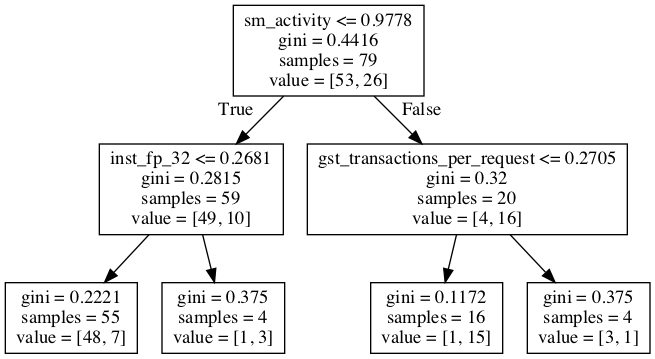

In [11]:
#
# Classification and Regression Trees(CART)
#
from sklearn.tree import DecisionTreeClassifier, export_graphviz

dtree = DecisionTreeClassifier(random_state=0, max_depth=2)
dtree.fit(df_X, df_y)

# plot
export_graphviz(dtree, feature_names=df_X.columns)

# Run this if you have graphviz installed
!dot -Tpng tree.dot -o tree.png

from IPython.display import Image
Image("tree.png", unconfined=True)

In [64]:
def GreedySearch_dtree(df_X, df_y):
    # StratifiedKFold
    from sklearn.model_selection import StratifiedKFold
    # 3 fold, stratifiedKFold
    kf = StratifiedKFold(n_splits=3, random_state=314159, shuffle=True)  
    #kf.get_n_splits(df_X)
    print kf

    #
    # parameters
    # 
    parameters = {'criterion': ('gini', 'entropy'),
                  'max_depth': [2, 3, 4, 5 , 6, 7, 8, 9, 10]}
        
    param_combo = []
    for v1 in parameters['criterion']:
        for v2 in parameters['max_depth']:
            param_combo.append({'criterion': v1, 'max_depth': v2})    
    #for combo in param_combo: print combo
    
    
    #
    # go through each combo, find out the error rate
    #
    param_combo_dd = {}
    minError = 1
    for current_param in param_combo:
        #print current_param

        #
        # run Kfold
        #
        error_list = []
        for train_index, test_index in kf.split(df_X, df_y):
            #print("TRAIN:", train_index, "TEST:", test_index)
            X_train, X_test = df_X.loc[train_index], df_X.loc[test_index]
            y_train, y_test = df_y.loc[train_index], df_y.loc[test_index]

            dtree = DecisionTreeClassifier(criterion=current_param['criterion'], 
                                           random_state=0, 
                                           max_depth=current_param['max_depth'])
            dtree.fit(X_train, y_train)
            err = metrics.mean_absolute_error(y_test, dtree.predict(X_test))
            error_list.append(err)

        #
        # update error 
        #
        
        # use mean error for comparision
        eval_error = np.mean(error_list)
        #print eval_error
        
        if eval_error < minError:
            minError = eval_error
            
        param_combo_dd[eval_error] = current_param
 
    #
    # print final results
    #
    
    #print param_combo_dd
    return minError, param_combo_dd[minError]

In [65]:
dt_tree_error, dt_tree_params = GreedySearch_dtree(df_X, df_y)
print dt_tree_error, dt_tree_params

StratifiedKFold(n_splits=3, random_state=314159, shuffle=True)
0.24246913580246912 {'criterion': 'entropy', 'max_depth': 2}
